# Assignment 1 at Neural Networks and Deep Learning

## 1)Import dataset and reshape

In [16]:
import keras
import tensorflow as tf
import numpy as np 
import pandas as pd
import math
from keras import layers
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.datasets import cifar10
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


#(x_train, y_train), (x_test, y_test) = mnist.load_data()#MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()#cifar10 dataset

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)


# Reshape the data,comment that for CNN model
#x_traink = x_train.reshape((-1, 28*28)) #for MNIST dataset
#x_testk = x_test.reshape((-1, 28*28)) 
#x_traink,x_testk,y_traink,y_testk are used for KNN and NCC
x_traink = x_train.reshape((-1, 32*32*3)) #for cifar10 dataset
x_testk = x_test.reshape((-1, 32*32*3)) 

# Encode the labels
y_traink = keras.utils.to_categorical(y_train, num_classes=10)
y_testk = keras.utils.to_categorical(y_test, num_classes=10)

x_train=x_traink#comment this for Cnn model
x_test=x_testk#comment this for Cnn model
y_train=y_traink
y_test=y_testk

#we want the transpose matrices for Neural Network from scratch,comment this for keras models
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

#Normalization
layertrain = layers.Normalization()
layertrain.adapt(x_train)
x_train = layertrain(x_train)
layertest=layers.Normalization()
layertest.adapt(x_test)
x_test=layertest(x_test)



Train/test data shape: (50000, 32, 32, 3) (10000, 32, 32, 3)
Train/test labels shape: (50000, 1) (10000, 1)


## 2)Preprocessing and PCA

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
#Fit to data, then transform it.
x_traink = sc.fit_transform(x_traink)
#Perform standardization by centering and scaling.
x_testk = sc.transform(x_testk)
#Applying PCA function for n_components=2
pca = PCA(n_components = 2)
x_traink = pca.fit_transform(x_traink)
x_testk = pca.transform(x_testk)

  

## 3)KNN Algorithm

#### A)KNN with sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#setting how many neighbors to look
neighbors=3
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=neighbors)
#Train the model using the training sets
knn.fit(x_traink, y_traink)
#Predict for test dataset
y_predk = knn.predict(x_testk)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testk, y_predk))
#Classification report
print("Classification Report:")
cr = metrics.classification_report(y_testk, y_predk)
print(cr)


Accuracy: 0.0685
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.12      0.18      1000
           1       0.17      0.06      0.08      1000
           2       0.15      0.06      0.08      1000
           3       0.11      0.04      0.05      1000
           4       0.13      0.04      0.06      1000
           5       0.16      0.06      0.08      1000
           6       0.18      0.07      0.10      1000
           7       0.11      0.03      0.05      1000
           8       0.23      0.10      0.14      1000
           9       0.25      0.11      0.15      1000

   micro avg       0.19      0.07      0.10     10000
   macro avg       0.18      0.07      0.10     10000
weighted avg       0.18      0.07      0.10     10000
 samples avg       0.07      0.07      0.07     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### B)KNN from scratch

In [ ]:
#predicts the label of test x_t with k-neares neighbors
def predictKNeighbors(x_t,k):
    #the 10 classes 
    classes = np.arange(10)
    #counting for each class
    classVotes =np.zeros(10)
    neighbors=getKNeighbors(x_t,k)
    for i in range(k):
        p=neighbors[i]
    if p in classes:
        classVotes[p]+=1
    return np.argmax(classVotes)
#function that returns the labels of k-nearest neighbors of x_t
def getKNeighbors(x_t,k):
    distances=[]
    neighbors=[]
    for i in range(x_traink.shape[0]):
        d=euclideanDistance(x_t,x_traink[i])
        #append to the list distances the labels of each train example and its calculated distance from x_t
        distances.append((np.argmax(y_traink[i]), d))
    #sort distances by euclidean distances    
    distances.sort(key=sort)
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors
#function that calculates euclideanDistance
def euclideanDistance(x,y):
    distance = 0
    for i in range(len(x)):
        distance += pow((x[i] - y[i]), 2)
    return math.sqrt(distance)
#function that helps sort list distances
def sort(e):
    return e[:][1]

In [ ]:
#Predict for test dataset
y_pred=[]
numberOFtests=300#its too slow for whole test set so i chose a part of the test set
for i in range(numberOFtests):
    y_pred.append(predictKNeighbors(x_testk[i],3))
    if((i%100)==0):
      print(i)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(np.argmax(y_testk[0:numberOFtests],1), y_pred))
#Classification report
print("Classification Report:")
cr = metrics.classification_report(np.argmax(y_testk[0:numberOFtests],1), y_pred)
print(cr)

0
100
200
Accuracy: 0.14666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.17      0.18        36
           1       0.11      0.17      0.13        24
           2       0.08      0.07      0.08        27
           3       0.10      0.10      0.10        29
           4       0.07      0.09      0.08        23
           5       0.12      0.11      0.11        28
           6       0.28      0.24      0.25        34
           7       0.13      0.15      0.14        27
           8       0.22      0.19      0.20        37
           9       0.16      0.14      0.15        35

    accuracy                           0.15       300
   macro avg       0.15      0.14      0.14       300
weighted avg       0.15      0.15      0.15       300



In [ ]:
from sklearn.neighbors import NearestCentroid
#Create NearestCentroid Classifier
model = NearestCentroid()
y_train_values=np.argmax(y_traink,1)
#Train the model using the training sets
model.fit(x_traink, y_train_values)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",model.score(x_testk,np.argmax(y_testk,1)))
#Predict for test dataset
y_pred=model.predict(x_testk)
#Classification report
print("Classification Report:")
cr = metrics.classification_report(np.argmax(y_testk,1), y_pred)
print(cr)


Accuracy: 0.2061
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.53      0.31      1000
           1       0.16      0.15      0.15      1000
           2       0.18      0.07      0.10      1000
           3       0.11      0.01      0.01      1000
           4       0.15      0.03      0.05      1000
           5       0.20      0.23      0.22      1000
           6       0.18      0.50      0.26      1000
           7       0.10      0.02      0.03      1000
           8       0.26      0.21      0.23      1000
           9       0.30      0.32      0.30      1000

    accuracy                           0.21     10000
   macro avg       0.19      0.21      0.17     10000
weighted avg       0.19      0.21      0.17     10000



## 4)Nearest Class Centroid

## Results of KNN and NCC for mnist and cifar-10 databases

## 5)Building neural network from scratch

### Initialization of parameters using He weight initialization

In [2]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims= array  containing the nodes of each layer of NN
    
    Returns:
    parameters = dictionary containing the parameters "W1", "b1", ..., "WL", "bL":
                    Wl= weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl= bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    # number of layers in NN +1 for layer 0 that is the input
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] =np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])#he weight initialization 
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))#setting bias to zero

        
    return parameters

### Activation functions:

In [3]:
def sigmoid(Z):
    """
    Implements the sigmoid activation 
    
    Arguments:
    Z = Output of the linear layer, of any shape
    
    Returns:
    A = output of sigmoid(z), same shape as Z
    cache = returns Z as well, useful for backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z = Output of the linear layer, of any shape

    Returns:
    A = output of relu(z),same shape as Z
    cache = returns Z as well, useful for backpropagation
    """
    
    A = np.maximum(0,Z)
    cache = Z 

    return A, cache

def tanh(Z):
    """
    Implements the tanh activation 
    
    Arguments:
    Z = Output of the linear layer, of any shape
    
    Returns:
    A = output of tanh(z), same shape as Z
    cache = returns Z as well, useful during backpropagation
    """
    A=np.tanh(Z)
    cache=Z

    return A,cache;



### Implementation of  linear part of a layer's forward propagation

In [4]:
def linear_forward(A, W, b):
    """
    Arguments:
    A = activations from previous layer (or input data),numpy array of shape (size of previous layer, number of examples)
    W = weights matrix,numpy array of shape (size of current layer, size of previous layer)
    b = bias vector,numpy array of shape (size of the current layer, 1)

    Returns:
    Z = output of linear part or the input of the activation function
    cache = a python tuple containing "A", "W" and "b" , useful during backpropagation
    """
    
    Z =np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

### Implementation of  forward propagation for a layer

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev = activations from previous layer (or input data),numpy array of shape (size of previous layer, number of examples)
    W = weights matrix, numpy array of shape (size of current layer, size of previous layer)
    b = bias vector, numpy array of shape (size of the current layer, 1)
    activation = the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh"

    Returns:
    A = the output of the activation function 
    cache = a python tuple containing "linear_cache" and "activation_cache",useful during backpropagation
    """
    
    if activation == "sigmoid":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=sigmoid(Z)
        
    
    elif activation == "relu":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=relu(Z)

    elif activation == "tanh":
      Z,linear_cache=linear_forward(A_prev,W,b)
      A,activation_cache=tanh(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

### Implementation of forward propagation for L-1 layers with activation "activation" and for the last layer with sigmoid activation

In [6]:
def L_model_forward(X, parameters,activation):
    """
    Arguments:
    X = data, numpy array of shape (input size, number of examples)
    parameters = initialized parameters from initialize_parameters function
    activation=activation function for first L-1 layers stored as a text string: "sigmoid" or "relu" or "tanh"
    
    Returns:
    AL = activation value from the output (last) layer,numpy array of shape (output size,number of examples) where output_size=number of classes
    caches = list of caches containing every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    # number of layers in the NN ,its /2 because we have "W1", "b1", ..., "WL", "bL"
    L = len(parameters) // 2                  
    
    # Implement forward propagation for L-1 layers with activation "activation". Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A,cache=linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],activation)
        caches.append(cache)
    
    # Implement forward propagation for the last  layer with sigmoid activation. Add "cache" to the "caches" list.
    AL,cache=linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
          
    return AL, caches

### Implementation of cost function

In [7]:
def compute_cost(AL, Y):
    """
    Arguments:
    AL = probability vector corresponding to your label predictions, numpy array of shape  (number of clases, number of examples)
    Y = true "label" vector , numpy array of shape (number of classes, number of examples)

    Returns:
    cost = cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute cross-entropy loss from AL and Y.
    #product= element wise multiplacation of -Y and log(AL) arrays ,array of shape (number of classes, number of examples)
    product=-Y*np.log(AL)
    #coste=cost for every example,array of shape (1,number of examples)
    coste=np.sum(product,axis=0)
    #total cost 
    cost=1/m *np.sum(coste)
    
    
    cost = np.squeeze(cost)      # To make sure  cost's shape is what we expect
    
    
    return cost

### Calculate local gradients for different activation functions

In [8]:
def relu_local_gradient(dA, cache):
    """
    Calculate the local gradient for a  relu unit with respect to Z given the post-activation gradient

    Arguments:
    dA = post-activation gradient, of any shape
    cache = 'Z' Output of the linear layer

    Returns:
    dZ =Local gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_local_gradient(dA, cache):
    """
    Calculate the local gradient for a  sigmoid unit with respect to Z given the post-activation gradient.

    Arguments:
    dA = post-activation gradient, of any shape
    cache ='Z' Output of the linear layer

    Returns:
    dZ = Local gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def tanh_local_gradient(dA,cache):
    """
    Calculate the local gradient for a  tanh unit with respect to Z given the post-activation gradient.

    Arguments:
    dA = post-activation gradient, of any shape
    cache ='Z' Output of the linear layer

    Returns:
    dZ = Local gradient of the cost with respect to Z
    """
    Z=cache
    dZ=dA*(1-np.tanh(Z)**2)

    return dZ;

### Calculate the gradients for parameters update and for previous layer back propagation

In [9]:
def linear_backward(dZ, cache):
    """
    Arguments:
    dZ = Local gradient of the cost with respect to Z, linear output (of current layer l)
    cache = tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev = Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW = Gradient of the cost with respect to W (current layer l), same shape as W
    db = Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW=1/m *np.matmul(dZ,A_prev.T)
    db=1/m * np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.matmul(W.T,dZ)
    
    return dA_prev, dW, db

### Implementation of whole backward propagation for a layer

In [10]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA = post-activation gradient for current layer l 
    cache = tuple of values (linear_cache, activation_cache)  stored for computing backward propagation 
    activation = the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh"
    
    Returns:
    dA_prev = Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW = Gradient of the cost with respect to W (current layer l), same shape as W
    db = Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ=relu_local_gradient(dA, activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ=sigmoid_local_gradient(dA, activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)

    elif activation == "tanh":
        dZ=tanh_local_gradient(dA, activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
        
    
    return dA_prev, dW, db

### Implementation of backward propagation for L-1 layers with activation function and for the last with sigmoid function

In [11]:
def L_model_backward(AL, Y, caches,activation):
    """
    Arguments:
    AL = probability vector corresponding to your label predictions, numpy array of shape  (number of clases, number of examples)
    Y = true "label" vector , numpy array of shape (number of classes, number of examples)
    caches = list of caches containing:every cache of linear_activation_forward() with "activation" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    activation=activation function for first L-1 layers stored as a text string: "sigmoid" or "relu" or "tanh"
    Returns:
    grads = A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the derivative of AL,the output of lat layer
    dAL = -np.divide(Y, AL)
    
    # Lth layer  gradients
    current_cache=caches[L-1]
    dA_prev_temp,dW_temp,db_temp=linear_activation_backward(dAL,current_cache,'sigmoid')
    grads["dA" + str(L-1)] =dA_prev_temp
    grads["dW" + str(L)] =dW_temp
    grads["db" + str(L)] =db_temp

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (ACTIVATION -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache=caches[l]
        dA_prev_temp,dW_temp,db_temp=linear_activation_backward(dA_prev_temp,current_cache,activation)
        grads["dA" + str(l)] =dA_prev_temp
        grads["dW" + str(l+1)] =dW_temp
        grads["db" + str(l+1)] =db_temp
        

    return grads

### Update parameters using gradient descent

In [13]:
def update_parameters(params, grads, learning_rate):
    """
    Arguments:
    params= python dictionary containing your parameters 
    grads = python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters = python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    # number of layers in the NN ,its /2 because we have "W1", "b1", ..., "WL", "bL"
    L = len(parameters) // 2 

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W"+str(l+1)]= parameters["W"+str(l+1)] + learning_rate * grads["dW" + str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)] +learning_rate *grads["db" + str(l+1)]
        
    return parameters

### Implementation  of a L-layer NN for classification with L-1 layers with "activation" function and the last layer with sigmoid activation

In [14]:
def L_layer_model(X, Y, layers_dims,activation, learning_rate = 0.0075, num_iterations = 3000, print_cost=False,):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X = data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y = true "label" vector , of shape (number of classes, number of examples)
    layers_dims = list containing the input size and each layer size, of length (number of layers + 1).
    activation= activation function for first L-1 layers stored as a text string: "sigmoid" or "relu" or "tanh"
    learning_rate = learning rate of the gradient descent update rule
    num_iterations = number of iterations of the optimization loop
    print_cost = if True, it prints the cost every 100 steps
    
    Returns:
    parameters = parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters=initialize_parameters(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> activation]*(L-1) -> LINEAR -> SIGMOID.
        AL,caches=L_model_forward(X,parameters,activation)
        
        
        # Compute cost.
        cost=compute_cost(AL, Y)
    
        # Backward propagation.
        grads= L_model_backward(AL, Y, caches,activation)
        
 
        # Update parameters.
        parameters=update_parameters(parameters, grads, learning_rate)
        
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [17]:
#layers_dims = [784, 64, 32, 16, 10]#for Mnist dataset
layers_dims = [3072, 256, 64,  10] #for cifar10 dataset
activation="sigmoid"
parameters, costs = L_layer_model(x_train, y_train,layers_dims,activation,learning_rate=0.03, num_iterations = 1000, print_cost = True)
#pred_train = predict(x_train,y_train, parameters,activation)
#pred_test = predict(x_test, y_test, parameters,activation)
y_train_pred, caches = L_model_forward(x_train, parameters,activation)
# convert probas to 0-10 prediction
y_train_pred = np.argmax(y_train_pred,axis=0)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(np.argmax(y_train,axis=0), y_train_pred))
#Classification report
print("Classification Report:")
cr = metrics.classification_report(np.argmax(y_train,axis=0), y_train_pred)
print(cr)
y_test_pred, caches = L_model_forward(x_test, parameters,activation)
# convert probas to 0-10 prediction
y_test_pred = np.argmax(y_test_pred,axis=0)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(np.argmax(y_test,axis=0), y_test_pred))
#Classification report
print("Classification Report:")
cr = metrics.classification_report(np.argmax(y_test,axis=0), y_test_pred)
print(cr)
plot_costs(costs)
#print_mislabeled_images(classes,x_test, y_test, pred_test)

Cost after iteration 0: 0.6779928364910706
Cost after iteration 100: 8.902473555239633
Cost after iteration 200: 25.15117719558575
Cost after iteration 300: 42.674405346885216
Cost after iteration 400: 60.50712155583745
Cost after iteration 500: 78.95740053848482
Cost after iteration 600: 97.66834962712555
Cost after iteration 700: 116.5499480781811
Cost after iteration 800: 135.4511084749548
Cost after iteration 900: 154.35124793798948
Cost after iteration 999: 173.06236093599094
Accuracy: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.00      0.00      0.00      5000
           2       0.00      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.10      1.00      0.18      5000
           5       0.00      0.00      0.00      5000
           6       0.00      0.00      0.00      5000
           7       0.00      0.00      0.00 

c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Accuracy: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\michail dadopoulos\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

NameError: name 'plot_costs' is not defined

### Results for layers [3072, 256, 128, 64, 32, 10],cifar10 dataset,learning rate=0.03,iterations 2000,5 hour and 1 minutes training ,with he initialization,full batch,with normalization,relu activation

Cost after iteration 0: 0.9317825369690396\
Cost after iteration 1999: 0.00010914024495493789\
Train Accuracy: 0.17506\
Test Accuracy: 0.1709\
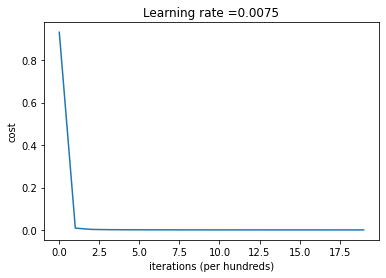




### Results for layers [3072, 256, 128, 64, 32, 10],cifar10 dataset,learning rate=0.0075,iterations 2500,6 hour and 10 minutes training ,with he initialization,full batch,with normalization,relu activation

Cost after iteration 0: 0.9317825369690396\
Cost after iteration 2499: 0.000486231319594058\
Train Accuracy: 0.17238000000000003\
Test Accuracy: 0.16510000000000002

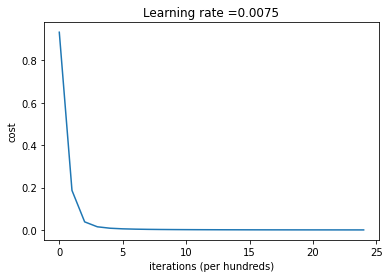



### Results for layers [784, 64, 32, 16, 10] ,mnist dataset, learning rate=0.0075,iterations 2500,1 hour and 30 minutes training ,with he initialization,full batch,no normalization,relu activation

Cost after iteration 0: 0.7534273536560523\
Cost after iteration 2499: 0.041767638716373165\
Accuracy: 0.4391000000000001\
Accuracy: 0.4353000000000001
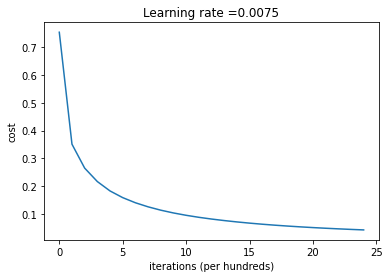

### Evaluation:
It seems to be better and better with more iterations but it need too much time,learning rate=0.03 was better than 0.0075

### Keras Implementation of Neural Network build from scratch

In [ ]:
def simple_nn():
  """
  Implements a simple full Dense NN with 5 layers

  Arguments:
  None

  Returns:
  model= Keras Sequential model 
  """
  model = Sequential() 
  model.add(Dense(units=256, activation='relu', input_shape=(3072,)))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=10, activation='sigmoid'))


  return model


In [ ]:
simple_nn=simple_nn()
simple_nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
simple_nn.summary()
simple_nn.fit(x_train, y_train,epochs=500, shuffle=True)
simple_nn.evaluate(x_test,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               786688    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 830,250
Trainable params: 830,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1563/1563 [=========================

[5.141814231872559, 0.508400022983551]

### Results of Full conntected NN for 200 iterations 25 minutes,sgd opimization,relu activation,loss=categorical_crossentropy
Train accuracy 1.00,loss: 8.0885e-05\
Test accuracy: 0.5219,loss: 6.9161

### Results of Full conntected NN for 700 iterations,batch size=400, 46 minutes,sgd opimization,relu activation,loss=categorical_crossentropy
Train accuracy: 1.0000,loss: 5.0130e-04 \
Test accuracy: 0.4819,loss: 6.4191 

### Results of Full conntected NN for 900 iterations, 2 hours 23 minutes,sgd opimization,relu activation,loss=categorical_crossentropy
Train  accuracy: 1.0000,loss: 8.5791e-06 \
Test accuracy: 0.5139,loss: 8.4879 

### Results of Full conntected NN for 500 iterations 2 hours 20 minutes,adam opimization,relu activation,loss=categorical_crossentropy
Train accuracy: 0.9757,loss: 0.0865 \
Test accuracy: 0.5084,loss: 5.1418 

### Results of Full conntected NN for 200 iterations, 30 minutes training,adam opimization,relu activation,loss=categorical_crossentropy
Train accuracy: 0.9622,loss:0.1230 \
Test accuracy: 0.5061,loss: 4.7828

### Results of Full conntected NN for batch size=400,700 iterations,48 minutes,adam opimization,sigmoid activation,loss=categorical_crossentropy
 Train accuracy: 0.9891,loss: 0.0332 \
 Test accuracy: 0.4195,loss: 5.3026 




### Results of Full conntected NN for 500 iterations 1 hour 47 minutes training,adam opimization,tanh activation,loss=categorical_crossentropy
Train accuracy: 0.5865,loss: 1.1654 \
Test accuracy: 0.4466,loss: 1.6616

### Evaluation:
Sgd optimiazation and relu gets worse with more iterations.Its  worst with sgd optimization than adam, after more iterations
relu is better activation than sigmoid and tanh is the worst.Its perfomance is much better and faster than similar NN from scratch.With adam and more iterations train accuracy improves and slightly improves test accuracy

### Keras Implementation of LeNet-5

In [ ]:
def cnn_model():
    """
    Implements the  model:
    CONV2D ->  MAXPOOL -> CONV2D  -> MAXPOOL  -> DENSE -> DENSE -> SOFTMAX
     
    Arguments:
    None

    Returns:
    model= Keras Sequential model 
    """
    model =Sequential()
    #Conv layer 1 with 8 5x5 filters and stride of 1 and sigmoid activation       
    model.add(Conv2D(filters = 8,kernel_size=5,strides=1,activation ='relu',input_shape = (32,32,3)))
    # Max Pooling layer 1 with pool size =2 and stride of 2
    model.add(MaxPooling2D(pool_size =2,strides=2))
    #Conv layer 2 with 16 5x5 filters and stride of 1 and sigmoid activation 
    model.add(Conv2D(filters = 16,kernel_size=5,strides=1,activation ='relu',input_shape = (14,14,3)))
    # Max Pooling layer 2 with pool size =2 and stride of 2
    model.add(MaxPooling2D(pool_size =2,strides=2))
    #Flatten
    model.add(Flatten())
    #Fully Connected Dense layer 1 with 120 unit for output & sigmoid activation
    model.add(Dense(units=120,activation='relu'))
    #Fully Connected Dense layer 2 with 84 unit for output & sigmoid activation
    model.add(Dense(units=84,activation='relu'))
    #Output Layer
    model.add(Dense(units=10,activation='softmax'))  
  
    return model

In [ ]:
cnn_model=cnn_model()
cnn_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()
cnn_model.fit(x_train, y_train, epochs=700, shuffle=True)
cnn_model.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

[9.236783981323242, 0.5787000060081482]

### Results of ReNet-5 with batch size=1600,epochs=500,adam optimizer,training 4 hours 3 minutes,loss=categorical_crossentropy


Train loss: 0.0062 - accuracy: 1.0000\
Test loss: 5.2187 - accuracy: 0.6113

### Results of ReNet-5 with batch size=400,epochs=500,sgd optimizer,training some hours,loss=categorical_crossentropy

Train loss: 0.2771 - accuracy: 0.9027\
Test loss: 1.7955 - accuracy: 0.6421

### Evaluation:
Test losses are high in every ocassion.Adam optimizer has higher train accuracy and lower train loss  but sgd optimizer higher test accuracy and lower test loss ,with more epochs sgd will be better.Is better to have batches size instead of None.

In [7]:
### Some useful links:

## https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
## https://www.edureka.co/blog/k-nearest-neighbors-algorithm/
## https://www.datatechnotes.com/2020/08/classification-with-nearest-centroid-in-python.html
## https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-6-68
## https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/
## https://keras.io/guides/preprocessing_layers/
## https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
## https://www.geeksforgeeks.org/cross-entropy-cost-functions-used-in-classification/
## https://www.analyticsvidhya.com/blog/2021/02/cost-function-is-no-rocket-science/
## https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
## https://www.youtube.com/watch?v=zwSXSltRhh0
## https://www.geeksforgeeks.org/principal-component-analysis-with-python/
## https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html